In [1]:
#resources used:
#https://physics.stackexchange.com/questions/256468/model-formula-for-bouncing-ball?fbclid=IwAR08NEEWvyamCWin8M1QmPf9fvQtUlCt6zIcuGO4-bL9WBlARNPnomvcONE
#https://thepythoncodingbook.com/2021/08/19/simulating-a-bouncing-ball-in-python/

In [2]:
from math import sqrt
import matplotlib.pyplot as plt
import os
import turtle
import time

In [3]:
## SETTINGS
h0 = 5         # m/s
v = 1          # m/s, current velocity
g = 9.81         # m/s/s
rho = 0.75     # coefficient of restitution
tau = 0.1     # contact time for bounce

In [4]:
## INITIALIZATION:
t = 0                            # starting time
dt = 0.001                       # time step
hmax = h0                        # keep track of the maximum height
h = h0
hstop = 0.01                     # stop when bounce is less than 1 cm
freefall = True                  # state: freefall or in contact
t_last = -sqrt(2*h0/g)           # time we would have launched to get to h0 at t=0
vmax = sqrt(2 * hmax * g)
H = []
T = []

In [5]:
## DATA STORAGE:
name="h"+str(h0)+"v"+str(v)+"g"+str(g)+"rho"+str(rho)+"tau"+str(tau)
path=os.getcwd()+"/SimulationResults/"+name

isExist = os.path.exists(path)          # Check whether the specified path exists or not
if not isExist:                         # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
f=open("SimulationResults/"+name+"/data",'w+')
f.write("h "+str(h0)+"\n"+"v "+str(v)+"\n"+"g "+str(g)+"\n"+"rho "+str(rho)+"\n"+"tau "+str(tau)+"\n")

The new directory is created!


32

In [6]:
## SIMULATION VISUALISATION
width = 600
height = 500
window = turtle.Screen()
window.setup(width, height)
window.tracer(0)
ball = turtle.Turtle()
ball.penup()
ball.color("green")
ball.shape("circle")

stopped bouncing at t=7.826



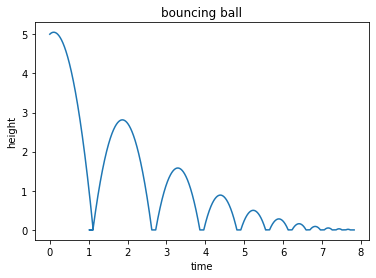

In [7]:
## SIMULATION
while(hmax > hstop):
  if(freefall):
    hnew = h + v*dt - 0.5*g*dt*dt
    if(hnew<0):
      t = t_last + 2*sqrt(2*hmax/g)
      freefall = False
      t_last = t + tau
      h = 0
    else:
      t = t + dt
      v = v - g*dt
      h = hnew
  else:
    t = t + tau
    vmax = vmax * rho
    v = vmax
    freefall = True
    h = 0
  ####
  ball.sety(h*80-200)
  window.update()
  a=1
  for i in range(5000):
      a=a^i
  ####
  hmax = 0.5*vmax*vmax/g
  f.write(str(t)+" "+str(h)+"\n")
  H.append(h)
  T.append(t)
f.close()
turtle.bye()
print("stopped bouncing at t=%.3f\n"%(t))

time.sleep(1)
plt.figure()
plt.plot(T, H)
plt.xlabel('time')
plt.ylabel('height')
plt.title('bouncing ball')
plt.savefig("SimulationResults/"+name+"/"+"figure"+".png")#+"/image{}.png".format(filenumber))